In [1]:
%load_ext autoreload
%autoreload 2

# DebtRank using Renormalizable model

## Generating networks with RM

In [2]:
import igraph as ig
import numpy as np
from src import renormalizable_model

#### Testing

In [2]:
strengths = [(1,1), (0,1), (0,0), (50, 50)]
n=len(strengths)
g1 = renormalizable_model.create_RM_graph(strengths, z=0)
g2 = renormalizable_model.create_RM_graph(strengths, z=1)
g3 = renormalizable_model.create_RM_graph(strengths, z=np.infty)

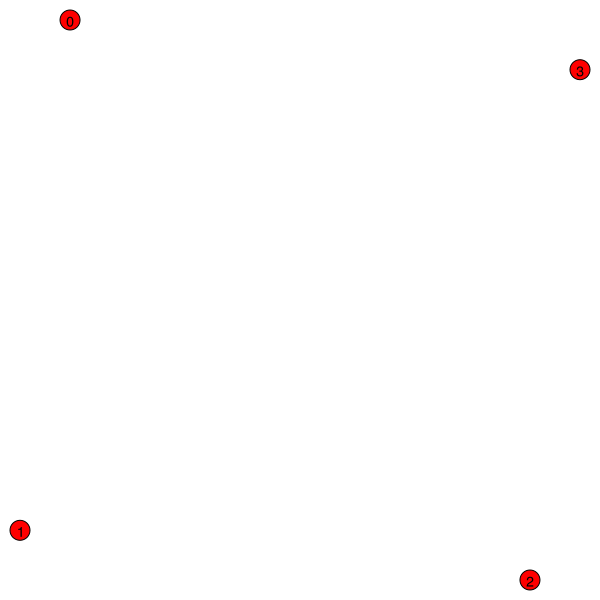

In [9]:
ig.plot(g1, vertex_label=range(n))

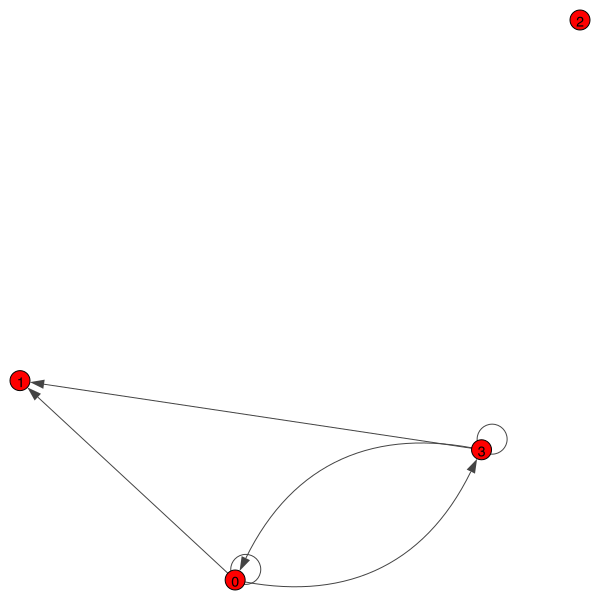

In [10]:
ig.plot(g2, vertex_label=range(n))

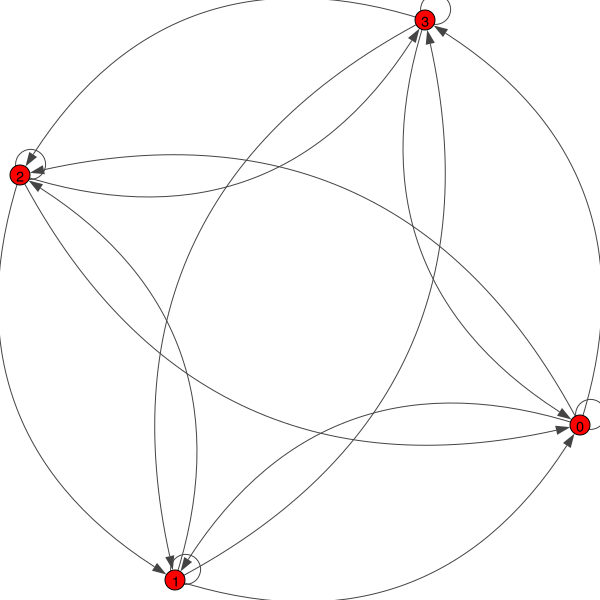

In [11]:
ig.plot(g3, vertex_label=range(n))

In [12]:
g4 = renormalizable_model.create_RM_graph(strengths, z=1, weighted=True)

Exception: Inconsistent weights

In [ ]:
strengths_2 = [(1,1), (2,0), (0, 50), (50, 2)]
g5 = renormalizable_model.create_RM_graph(strengths_2, z=1, weighted=True)

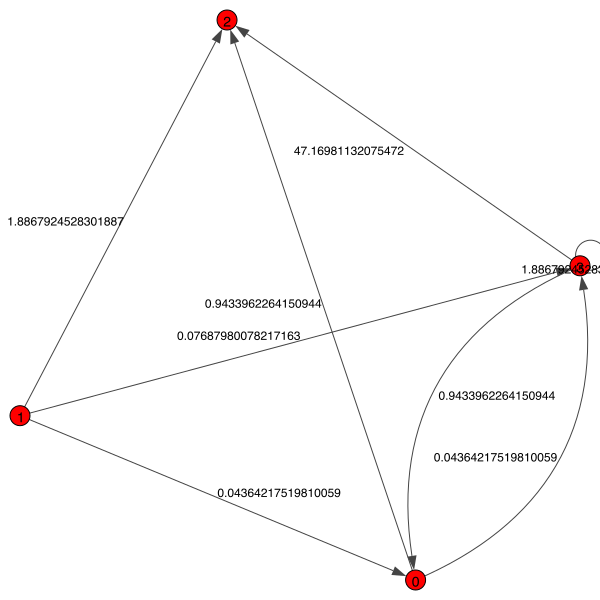

In [ ]:
ig.plot(g5, vertex_label=range(n), edge_label = g5.es["weight"])

In [ ]:
strengths_2 = [(1,1), (2,0), (0, 50), (50, 2)]
g6 = renormalizable_model.create_RM_graph(strengths_2, z=np.infty, weighted=True)

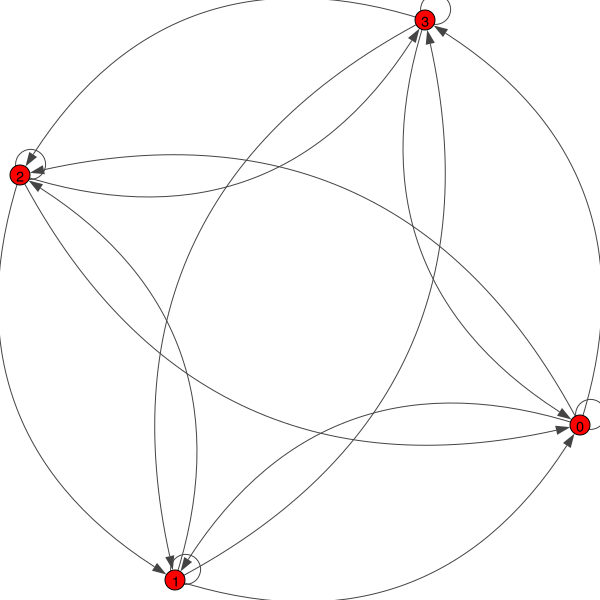

In [ ]:
ig.plot(g6, vertex_label=range(n))

## Coarse graining

#### Merging nodes

In [ ]:
from src import coarse_graining

In [ ]:
g = ig.Graph(5, [(0,1), (0,2), (1,2), (1,3), (4,2), (0,4)], directed=True)
g.es["weight"] = [1,2,3,4,5,6]

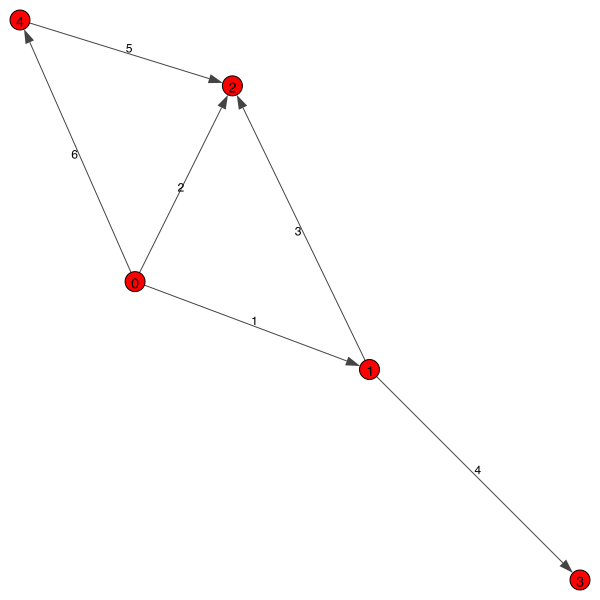

In [ ]:
ig.plot(g, vertex_label=g.vs.indices, edge_label = g.es["weight"])

In [ ]:
group_sequence = coarse_graining.divide_graph_equally(g, 2)
print(group_sequence)
g_coarse_grained = coarse_graining.coarse_grain_weighted_graph(g, group_sequence)

[array([0, 1, 2]), array([3, 4])]


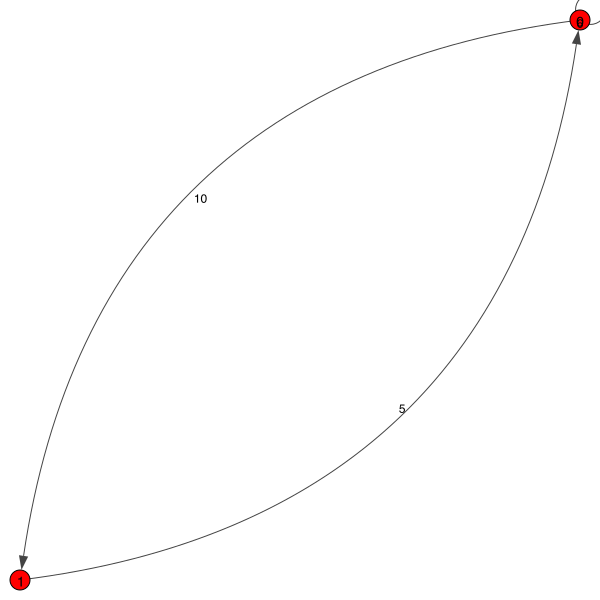

In [ ]:
ig.plot(g_coarse_grained, vertex_label=g_coarse_grained.vs.indices, edge_label = g_coarse_grained.es["weight"])

In [ ]:
group_sequence = coarse_graining.merge_n_group(g, int(len(g.vs.indices)/2))
print(group_sequence)
g_coarse_grained2 = coarse_graining.coarse_grain_weighted_graph(g, group_sequence)

[[0, 1], [2], [3], [4]]


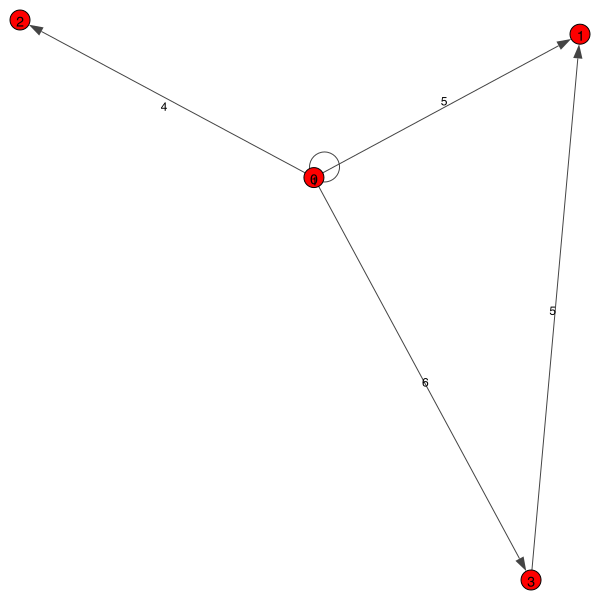

In [ ]:
ig.plot(g_coarse_grained2, vertex_label=g_coarse_grained2.vs.indices, edge_label = g_coarse_grained2.es["weight"])

## Network properties

In [2]:
from src import network_properties
from tqdm import tqdm
from matplotlib import pyplot as plt

In [3]:
sigma = 2.28
mu = -(sigma**2)/2
size = 500
#strengths = renormalizable_model.make_strengths_consistent(np.random.lognormal(mean=mu, sigma=sigma, size=[500,2]))
gen_strengths = np.random.lognormal(mean=mu, sigma=sigma, size=size)
strengths = np.stack([gen_strengths, gen_strengths], axis=1)
z = 10**(-1)

In [4]:
graph = renormalizable_model.create_RM_graph(strengths, z, weighted=True)

In [52]:
import pickle

In [6]:
z_arr = np.logspace(-6, 3, 10)
ensemble_size = 100
ensembles = [renormalizable_model.generate_RM_ensemble(ensemble_size, strengths, z, weighted = True) for z in z_arr]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:28<00:00,  3.46it/s]


### Clustering coefficient

TODO different z + quantiles

Reproduce graph from multiscale paper, unweighted and weighted, generate one graph, compute strengths, then reconstruct

clustering coeff weighted une'weighted, average nn strength, aberage nn degree, two strategies for weighted coarse graining

Compare average quantities, variances

/Volumes/Datový disk/FJFI/Leiden/Research/Renormalization-Network-Reconstruction/src/network_properties.py:32: RuntimeWarning: invalid value encountered in divide
  clustering_coeff_k = clustering_coeff_k/degree_hist


Text(0, 0.5, '$\\overline{C}(k)$')

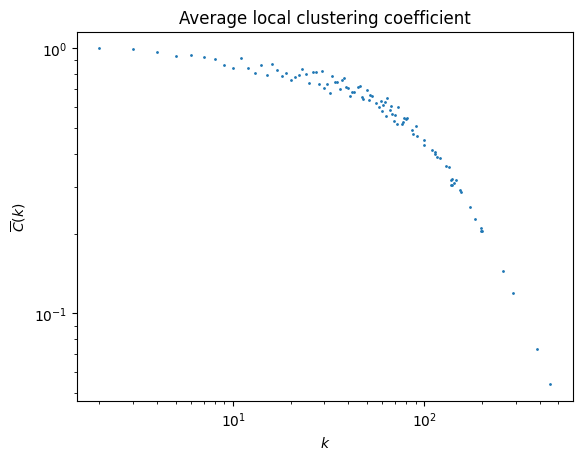

In [6]:
_, c_k = network_properties.clustering_coeff(graph)
plt.scatter(range(1, len(c_k)+1), c_k, s=1)
plt.xscale('log')
plt.yscale('log')
plt.title('Average local clustering coefficient')
plt.xlabel(r'$k$')
plt.ylabel(r'$\overline{C}(k)$')

In [7]:
c_k_array = [np.nanmean([network_properties.clustering_coeff(graph, len_deg_seq=size+1)[1] for graph in tqdm(ensemble)], axis=0) for ensemble in ensembles]

  0%|          | 0/100 [00:00<?, ?it/s]/Volumes/Datový disk/FJFI/Leiden/Research/Renormalization-Network-Reconstruction/src/network_properties.py:32: RuntimeWarning: invalid value encountered in divide
  clustering_coeff_k = clustering_coeff_k/degree_hist
100%|██████████| 100/100 [00:00<00:00, 2226.83it/s]
/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_42520/2508086241.py:1: RuntimeWarning: Mean of empty slice
  c_k_array = [np.nanmean([network_properties.clustering_coeff(graph, len_deg_seq=size+1)[1] for graph in tqdm(ensemble)], axis=0) for ensemble in ensembles]
100%|██████████| 100/100 [00:06<00:00, 15.72it/s]


In [29]:
z_arr = np.logspace(-6, 1, 8)

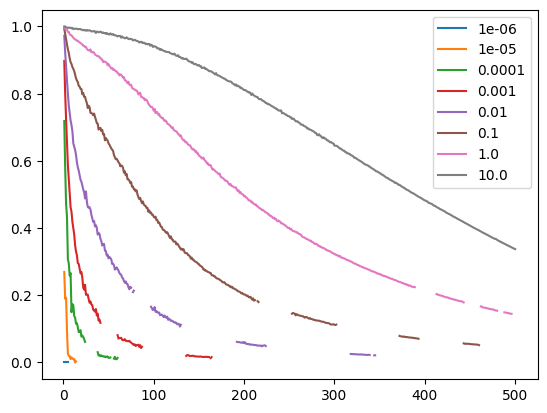

In [31]:
for arr, z in zip(c_k_array, z_arr):
    plt.plot(arr, label=f"{z}")
plt.legend()

Ensemble size 100

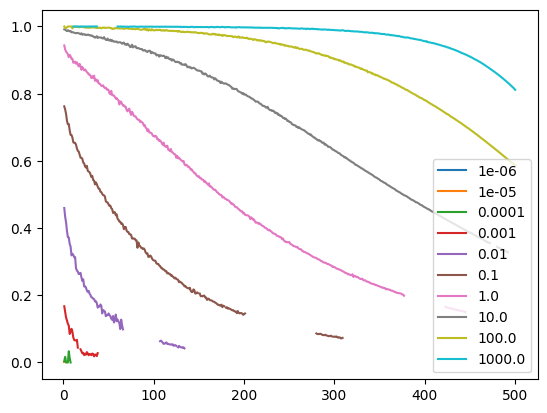

In [8]:
for arr, z in zip(c_k_array, z_arr):
    plt.plot(arr, label=f"{z}")
plt.legend()

Ensemble size 1000

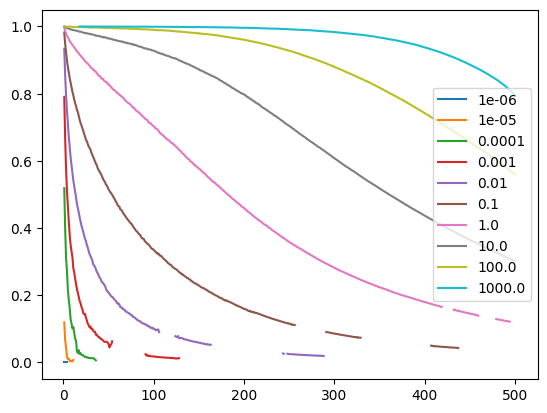

In [50]:
for arr, z in zip(c_k_array, z_arr):
    plt.plot(arr, label=f"{z}")
plt.legend()

### Average nearest neighbor degree

Text(0, 0.5, '$\\overline{k^{nn}}(k)$')

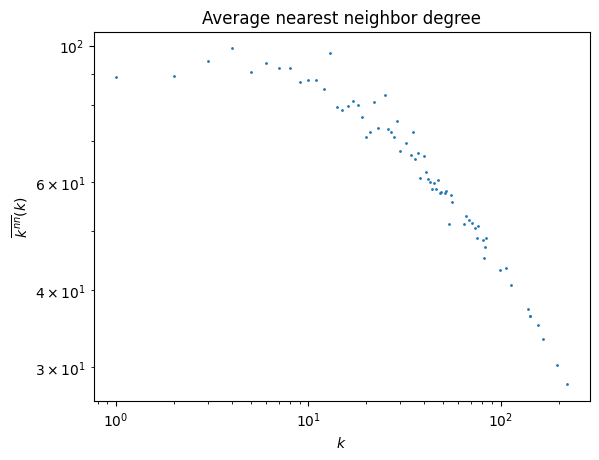

In [182]:
_, annd_k = network_properties.annd(graph, mode='all')
plt.scatter(range(1, len(annd_k)+1), annd_k, s=1)
plt.xscale('log')
plt.yscale('log')
plt.title('Average nearest neighbor degree')
plt.xlabel(r'$k$')
plt.ylabel(r'$\overline{k^{nn}}(k)$')

In [10]:
annd_k_array = [np.nanmean([network_properties.annd(graph, mode='all', len_deg_seq=size+1)[1] for graph in tqdm(ensemble)], axis=0) for ensemble in ensembles]

100%|██████████| 100/100 [00:00<00:00, 321.34it/s]
/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_42520/3386254905.py:1: RuntimeWarning: Mean of empty slice
  annd_k_array = [np.nanmean([network_properties.annd(graph, mode='all', len_deg_seq=size+1)[1] for graph in tqdm(ensemble)], axis=0) for ensemble in ensembles]
100%|██████████| 100/100 [00:14<00:00,  6.91it/s]


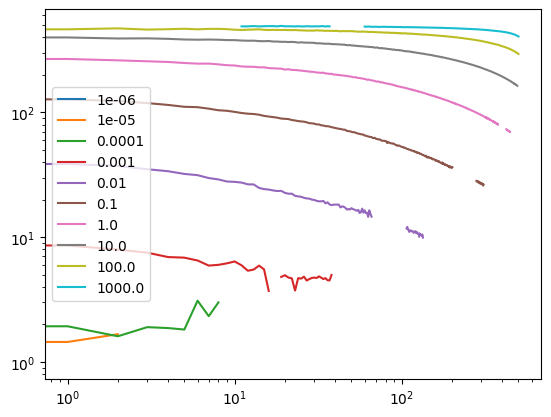

In [12]:
for arr, z in zip(annd_k_array, z_arr):
    plt.plot(arr, label=f"{z}")
plt.legend()
plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, '$\\overline{k^{nn}_{out}}(k_{out})$')

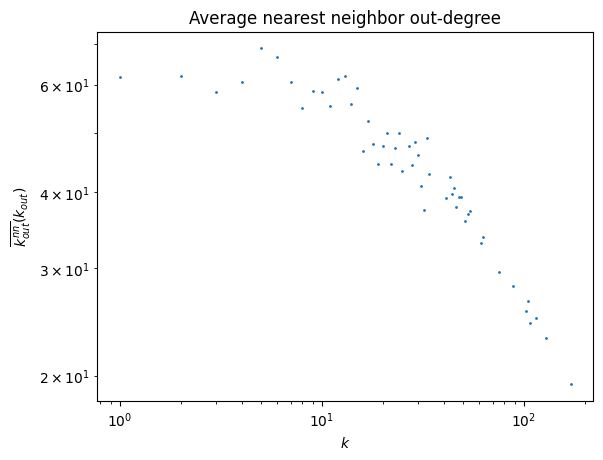

In [183]:
from matplotlib import pyplot as plt
_, annd_k_out = network_properties.annd(graph, mode='out')
plt.scatter(range(1, len(annd_k_out)+1), annd_k_out, s=1)
plt.xscale('log')
plt.yscale('log')
plt.title('Average nearest neighbor out-degree')
plt.xlabel(r'$k$')
plt.ylabel(r'$\overline{k^{nn}_{out}}(k_{out})$')

In [13]:
annd_k_out_array = [np.nanmean([network_properties.annd(graph, mode='out', len_deg_seq=size+1)[1] for graph in tqdm(ensemble)], axis=0) for ensemble in ensembles]

100%|██████████| 100/100 [00:00<00:00, 326.98it/s]
/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_42520/360429119.py:1: RuntimeWarning: Mean of empty slice
  annd_k_out_array = [np.nanmean([network_properties.annd(graph, mode='out', len_deg_seq=size+1)[1] for graph in tqdm(ensemble)], axis=0) for ensemble in ensembles]
100%|██████████| 100/100 [00:11<00:00,  8.39it/s]


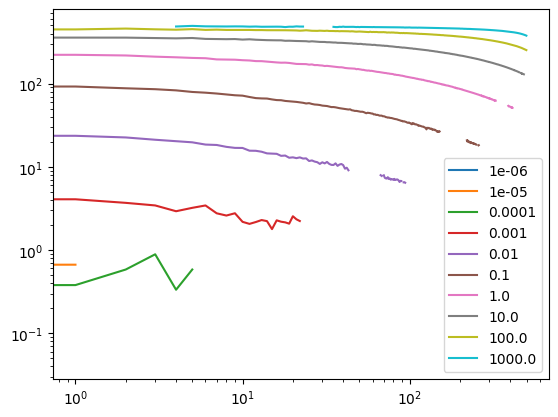

In [14]:
for arr, z in zip(annd_k_out_array, z_arr):
    plt.plot(arr, label=f"{z}")
plt.legend()
plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, '$\\overline{k^{nn}_{in}}(k_{in})$')

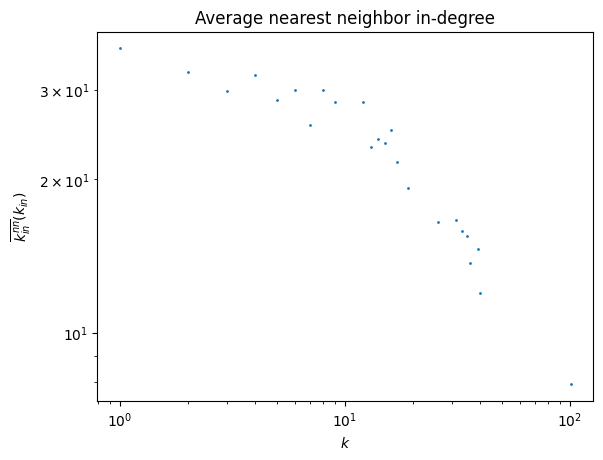

In [170]:
from matplotlib import pyplot as plt
_, annd_k_in = network_properties.annd(graph, mode='in')
plt.scatter(range(1, len(annd_k_in)+1), annd_k_in, s=1)
plt.xscale('log')
plt.yscale('log')
plt.title('Average nearest neighbor in-degree')
plt.xlabel(r'$k$')
plt.ylabel(r'$\overline{k^{nn}_{in}}(k_{in})$')

In [15]:
annd_k_in_array = [np.nanmean([network_properties.annd(graph, mode='in', len_deg_seq=size+1)[1] for graph in tqdm(ensemble)], axis=0) for ensemble in ensembles]

100%|██████████| 100/100 [00:00<00:00, 327.50it/s]
/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_42520/450679519.py:1: RuntimeWarning: Mean of empty slice
  annd_k_in_array = [np.nanmean([network_properties.annd(graph, mode='in', len_deg_seq=size+1)[1] for graph in tqdm(ensemble)], axis=0) for ensemble in ensembles]
100%|██████████| 100/100 [00:11<00:00,  8.58it/s]


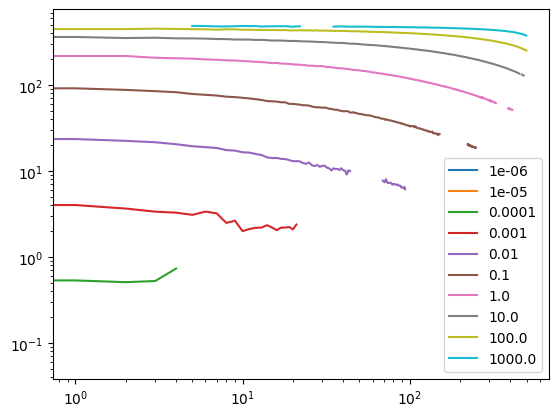

In [16]:
for arr, z in zip(annd_k_in_array, z_arr):
    plt.plot(arr, label=f"{z}")
plt.legend()
plt.xscale('log')
plt.yscale('log')

## Network properties on reconstructed networks

In [5]:
from src import network_properties
from tqdm import tqdm
from matplotlib import pyplot as plt

Generate ground-truth network

In [6]:
sigma = 2.28
mu = -(sigma**2)/2
size = 500
gen_strengths = np.random.lognormal(mean=mu, sigma=sigma, size=size)
strengths = np.stack([gen_strengths, gen_strengths], axis=1)
z = 10**(-1)

In [7]:
original_graph = renormalizable_model.create_RM_graph(strengths, z)

Infer z value

In [8]:
import scipy

In [9]:
num_of_links = original_graph.ecount()
in_strengths = original_graph.strength(mode='in', weights=original_graph.es["weight"])
out_strengths = original_graph.strength(mode='out', weights=original_graph.es["weight"])
def exp_num_of_links(z):
    return np.sum([1 - np.exp(-z*x_i*y_j) for x_i, y_j in np.array(np.meshgrid(out_strengths,in_strengths)).T.reshape(-1, 2)]) - num_of_links

In [10]:
exp_z_details = scipy.optimize.root_scalar(exp_num_of_links, method="bisect", bracket=[0,100])
print(exp_z_details)

      converged: True
           flag: converged
 function_calls: 48
     iterations: 46
           root: 0.10080736579567429


In [11]:
exp_z = exp_z_details.root

Generate ensemble using computed strengths

In [12]:
computed_strengths = np.stack([out_strengths, in_strengths], axis=1)
ensemble_size = 1000

In [13]:
ensemble = renormalizable_model.generate_RM_ensemble(ensemble_size, computed_strengths, exp_z, weighted = True)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [03:49<00:00,  4.36it/s]


#### Degrees

In [14]:
exp_degrees_out = np.nanmean([graph.degree(mode="out") for graph in ensemble], axis=0)

/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/2129753993.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(out_strenghts), original_graph.degree(mode="out"), s=1, label="True degrees")
/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/2129753993.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(out_strenghts), exp_degrees_out, s=1, label="Expected degrees")


Text(0.5, 1.0, 'Out-degree')

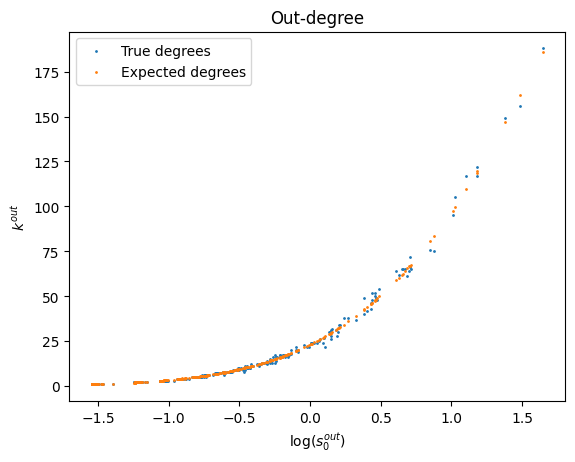

In [14]:
plt.scatter(np.log10(out_strengths), original_graph.degree(mode="out"), s=1, label="True degrees")
plt.scatter(np.log10(out_strengths), exp_degrees_out, s=1, label="Expected degrees")
plt.legend()
plt.xlabel(r"$\log(s_0^{out})$")
plt.ylabel(r"$k^{out}$")
plt.title("Out-degree")

/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/3972913263.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(in_strenghts), original_graph.degree(mode="in"), s=1, label="True degrees")
/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/3972913263.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(in_strenghts), exp_degrees_in, s=1, label="Expected degrees")


Text(0.5, 1.0, 'In-degree')

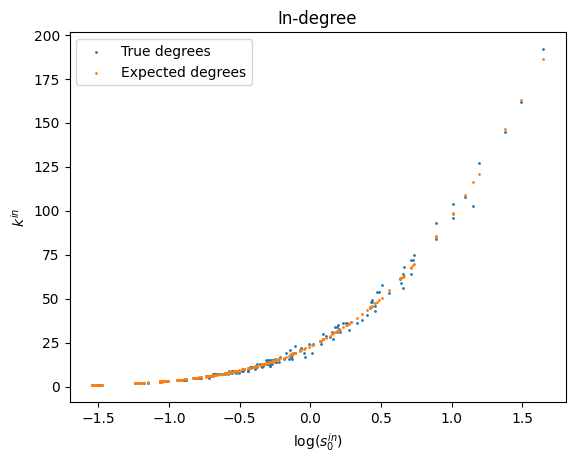

In [15]:
exp_degrees_in = np.nanmean([graph.degree(mode="in") for graph in ensemble], axis=0)
plt.scatter(np.log10(in_strengths), original_graph.degree(mode="in"), s=1, label="True degrees")
plt.scatter(np.log10(in_strengths), exp_degrees_in, s=1, label="Expected degrees")
plt.legend()
plt.xlabel(r"$\log(s_0^{in})$")
plt.ylabel(r"$k^{in}$")
plt.title("In-degree")

#### Average nearest neighbor degrees

/Users/daviddobas/miniconda3/envs/network_renormalisation/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/daviddobas/miniconda3/envs/network_renormalisation/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Volumes/Datový disk/FJFI/Leiden/Research/Renormalization-Network-Reconstruction/src/network_properties.py:19: RuntimeWarning: invalid value encountered in divide
  annd_k = annd_k/degree_hist
/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/695570496.py:1: RuntimeWarning: Mean of empty slice
  exp_annd_out = np.nanmean([network_properties.annd(graph, mode="out")[0] for graph in ensemble], axis=0)
/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/695570496.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(out_stren

Text(0.5, 1.0, 'Average nearest neighbor out-degree')

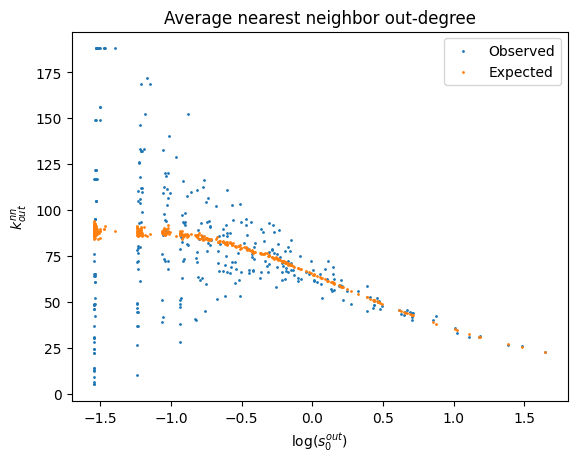

In [16]:
exp_annd_out = np.nanmean([network_properties.annd(graph, mode="out")[0] for graph in ensemble], axis=0)
plt.scatter(np.log10(out_strengths), network_properties.annd(original_graph, mode="out")[0], s=1, label="Observed")
plt.scatter(np.log10(out_strengths), exp_annd_out, s=1, label="Expected")
plt.legend()
plt.xlabel(r"$\log(s_0^{out})$")
plt.ylabel(r"$k^{nn}_{out}$")
plt.title("Average nearest neighbor out-degree")

/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/2642738607.py:1: RuntimeWarning: Mean of empty slice
  exp_annd_in = np.nanmean([network_properties.annd(graph, mode="in")[0] for graph in ensemble], axis=0)
/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/2642738607.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(in_strenghts), network_properties.annd(original_graph, mode="in")[0], s=1, label="Observed")
/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/2642738607.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(in_strenghts), exp_annd_in, s=1, label="Expected")


Text(0.5, 1.0, 'Average nearest neighbor in-degree')

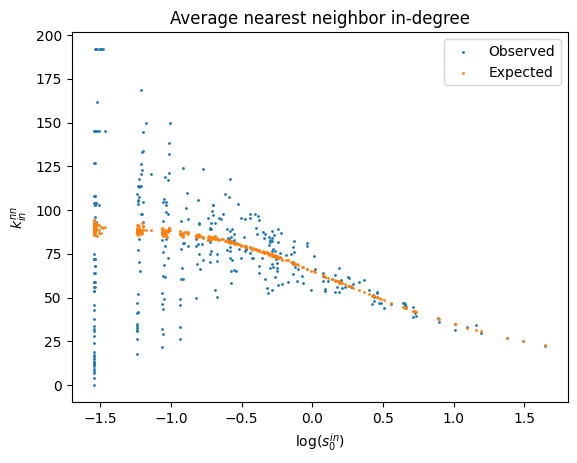

In [17]:
exp_annd_in = np.nanmean([network_properties.annd(graph, mode="in")[0] for graph in ensemble], axis=0)
plt.scatter(np.log10(in_strengths), network_properties.annd(original_graph, mode="in")[0], s=1, label="Observed")
plt.scatter(np.log10(in_strengths), exp_annd_in, s=1, label="Expected")
plt.legend()
plt.xlabel(r"$\log(s_0^{in})$")
plt.ylabel(r"$k^{nn}_{in}$")
plt.title("Average nearest neighbor in-degree")

#### Average nearest neighbor degree depending on k

/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/3819312755.py:1: RuntimeWarning: Mean of empty slice
  exp_annd_k_out = np.nanmean([network_properties.annd(graph, mode="out",len_deg_seq=size)[1] for graph in ensemble], axis=0)


Text(0, 0.5, '$\\overline{k^{nn}_{out}}(k_{out})$')

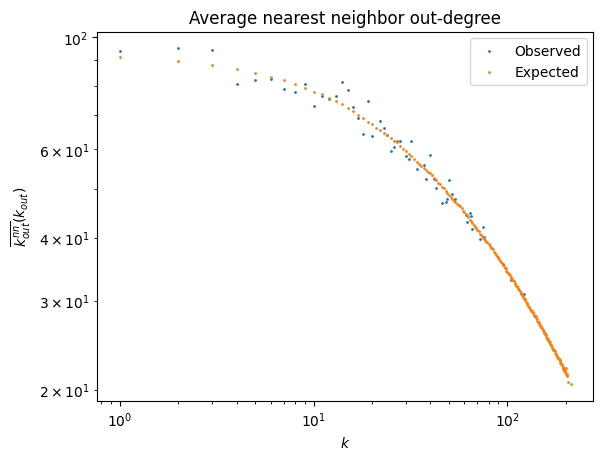

In [18]:
exp_annd_k_out = np.nanmean([network_properties.annd(graph, mode="out",len_deg_seq=size)[1] for graph in ensemble], axis=0)
obs_annd_k_out = network_properties.annd(original_graph, mode="out")[1]
plt.scatter(range(1, len(obs_annd_k_out)+1), obs_annd_k_out, s=1, label="Observed")
plt.scatter(range(1, len(exp_annd_k_out)+1), exp_annd_k_out, s=1, label="Expected")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('Average nearest neighbor out-degree')
plt.xlabel(r'$k$')
plt.ylabel(r'$\overline{k^{nn}_{out}}(k_{out})$')

/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/2709653768.py:1: RuntimeWarning: Mean of empty slice
  exp_annd_k_in = np.nanmean([network_properties.annd(graph, mode="in",len_deg_seq=size)[1] for graph in ensemble], axis=0)


Text(0, 0.5, '$\\overline{k^{nn}_{in}}(k_{in})$')

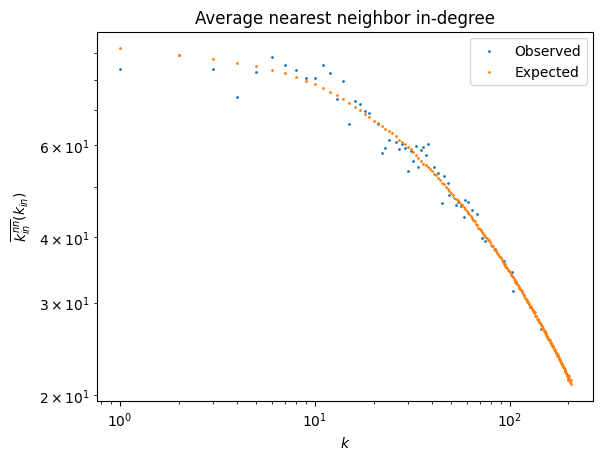

In [19]:
exp_annd_k_in = np.nanmean([network_properties.annd(graph, mode="in",len_deg_seq=size)[1] for graph in ensemble], axis=0)
obs_annd_k_in = network_properties.annd(original_graph, mode="in")[1]
plt.scatter(range(1, len(obs_annd_k_in)+1), obs_annd_k_in, s=1, label="Observed")
plt.scatter(range(1, len(exp_annd_k_in)+1), exp_annd_k_in, s=1, label="Expected")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('Average nearest neighbor in-degree')
plt.xlabel(r'$k$')
plt.ylabel(r'$\overline{k^{nn}_{in}}(k_{in})$')

/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/2346669681.py:1: RuntimeWarning: Mean of empty slice
  exp_annd_k = np.nanmean([network_properties.annd(graph, mode="all",len_deg_seq=size)[1] for graph in ensemble], axis=0)


Text(0, 0.5, '$\\overline{k^{nn}}(k)$')

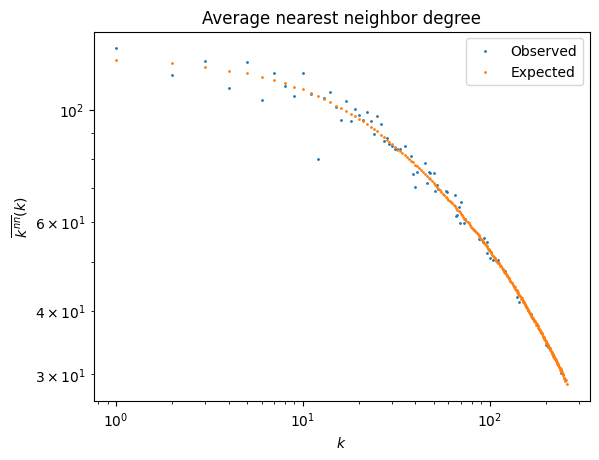

In [20]:
exp_annd_k = np.nanmean([network_properties.annd(graph, mode="all",len_deg_seq=size)[1] for graph in ensemble], axis=0)
obs_annd_k = network_properties.annd(original_graph, mode="all")[1]
plt.scatter(range(1, len(obs_annd_k)+1), obs_annd_k, s=1, label="Observed")
plt.scatter(range(1, len(exp_annd_k)+1), exp_annd_k, s=1, label="Expected")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('Average nearest neighbor degree')
plt.xlabel(r'$k$')
plt.ylabel(r'$\overline{k^{nn}}(k)$')

#### Average nearest neighbor strength

In [21]:
exp_anns_out = np.nanmean([network_properties.anns(graph, mode="out") for graph in tqdm(ensemble)], axis=0)

100%|██████████| 1000/1000 [15:58<00:00,  1.04it/s] 
/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/3436560272.py:1: RuntimeWarning: Mean of empty slice
  exp_anns_out = np.nanmean([network_properties.anns(graph, mode="out") for graph in tqdm(ensemble)], axis=0)


/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/2107262862.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(out_strenghts), network_properties.anns(original_graph, mode="out"), s=1, label="Observed")
/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/2107262862.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(out_strenghts), exp_anns_out, s=1, label="Expected")


Text(0.5, 1.0, 'Average nearest neighbor out-strength')

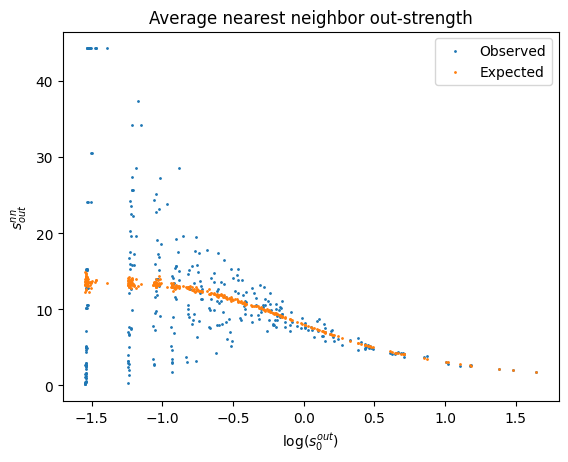

In [22]:
plt.scatter(np.log10(out_strengths), network_properties.anns(original_graph, mode="out"), s=1, label="Observed")
plt.scatter(np.log10(out_strengths), exp_anns_out, s=1, label="Expected")
plt.legend()
plt.xlabel(r"$\log(s_0^{out})$")
plt.ylabel(r"$s^{nn}_{out}$")
plt.title("Average nearest neighbor out-strength")

In [50]:
exp_anns_in = np.nanmean([network_properties.anns(graph, mode="in") for graph in tqdm(ensemble)], axis=0)

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/daviddobas/miniconda3/envs/network_renormalisation/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/daviddobas/miniconda3/envs/network_renormalisation/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 1000/1000 [07:54<00:00,  2.11it/s]
/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/3955390506.py:1: RuntimeWarning: Mean of empty slice
  exp_anns_in = np.nanmean([network_properties.anns(graph, mode="in") for graph in tqdm(ensemble)], axis=0)


/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/3855471362.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(in_strenghts), network_properties.anns(original_graph, mode="in"), s=1, label="Observed")
/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/3855471362.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(in_strenghts), exp_anns_in, s=1, label="Expected")


Text(0.5, 1.0, 'Average nearest neighbor in-strength')

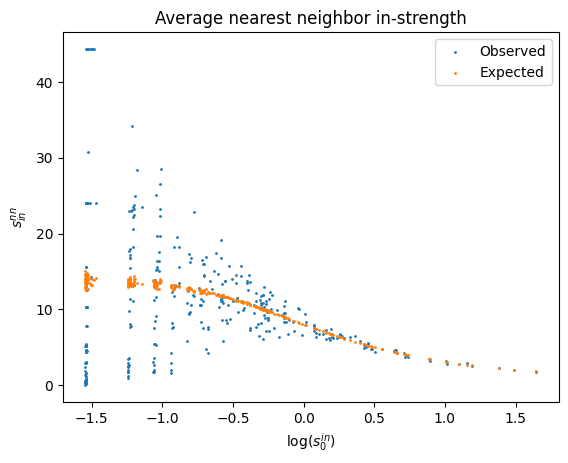

In [51]:
plt.scatter(np.log10(in_strengths), network_properties.anns(original_graph, mode="in"), s=1, label="Observed")
plt.scatter(np.log10(in_strengths), exp_anns_in, s=1, label="Expected")
plt.legend()
plt.xlabel(r"$\log(s_0^{in})$")
plt.ylabel(r"$s^{nn}_{in}$")
plt.title("Average nearest neighbor in-strength")

#### Local clustering coefficient

In [25]:
exp_cl_coeff_results = [[*network_properties.clustering_coeff(graph,len_deg_seq=size)] for graph in tqdm(ensemble)]

  0%|          | 0/1000 [00:00<?, ?it/s]/Volumes/Datový disk/FJFI/Leiden/Research/Renormalization-Network-Reconstruction/src/network_properties.py:41: RuntimeWarning: invalid value encountered in divide
  clustering_coeff_k = clustering_coeff_k/degree_hist
100%|██████████| 1000/1000 [00:01<00:00, 769.67it/s]


/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/4068063742.py:1: RuntimeWarning: Mean of empty slice
  exp_cl_coeff = np.nanmean([exp_cl_coeff_results[i][0] for i in range(len(exp_cl_coeff_results))], axis=0)
/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/4068063742.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(in_strenghts), network_properties.clustering_coeff(original_graph,len_deg_seq=size)[0], s=1, label="Observed")
/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/4068063742.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(in_strenghts), exp_cl_coeff, s=1, label="Expected")


Text(0.5, 1.0, 'Local clustering coefficient')

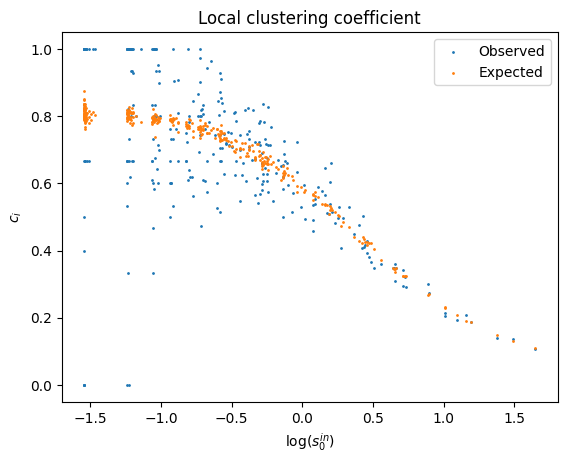

In [47]:
exp_cl_coeff = np.nanmean([exp_cl_coeff_results[i][0] for i in range(len(exp_cl_coeff_results))], axis=0)
plt.scatter(np.log10(in_strengths), network_properties.clustering_coeff(original_graph,len_deg_seq=size)[0], s=1, label="Observed")
plt.scatter(np.log10(in_strengths), exp_cl_coeff, s=1, label="Expected")
plt.legend()
plt.xlabel(r"$\log(s_0^{in})$")
plt.ylabel(r"$c_i$")
plt.title("Local clustering coefficient")

#### Clustering coefficient depending on k

/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/434390912.py:1: RuntimeWarning: Mean of empty slice
  exp_cl_coeff_k = np.nanmean([exp_cl_coeff_results[i][1] for i in range(len(exp_cl_coeff_results))], axis=0)


Text(0, 0.5, '$\\overline{c}(k)$')

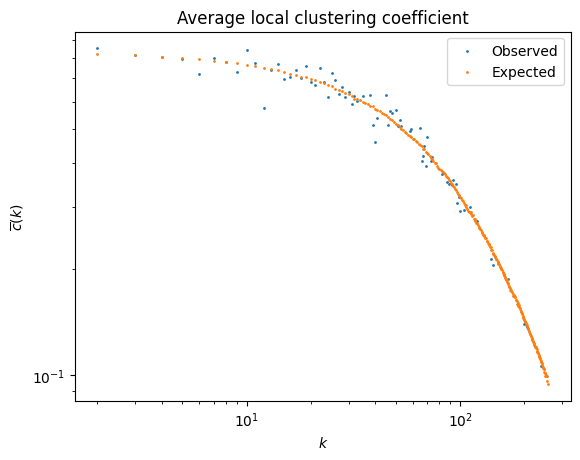

In [48]:
exp_cl_coeff_k = np.nanmean([exp_cl_coeff_results[i][1] for i in range(len(exp_cl_coeff_results))], axis=0)
obs_cl_coeff_k = network_properties.clustering_coeff(original_graph)[1]
plt.scatter(range(1, len(obs_cl_coeff_k)+1), obs_cl_coeff_k, s=1, label="Observed")
plt.scatter(range(1, len(exp_cl_coeff_k)+1), exp_cl_coeff_k, s=1, label="Expected")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('Average local clustering coefficient')
plt.xlabel(r'$k$')
plt.ylabel(r'$\overline{c}(k)$')

#### Weighted clustering coefficient

In [44]:
exp_weighted_cl_coeff = np.nanmean([network_properties.weighted_clustering_coeff(graph) for graph in tqdm(ensemble)], axis=0)

  0%|          | 0/1000 [00:00<?, ?it/s]/Volumes/Datový disk/FJFI/Leiden/Research/Renormalization-Network-Reconstruction/src/network_properties.py:60: RuntimeWarning: invalid value encountered in scalar divide
  w_cl_coeff_array[i] = w_cl_coeff_array[i]/num_wedges
100%|██████████| 1000/1000 [02:36<00:00,  6.37it/s]
/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/265764075.py:1: RuntimeWarning: Mean of empty slice
  exp_weighted_cl_coeff = np.nanmean([network_properties.weighted_clustering_coeff(graph) for graph in tqdm(ensemble)], axis=0)


/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/796870878.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(in_strenghts), network_properties.weighted_clustering_coeff(original_graph), s=1, label="Observed")
/var/folders/td/zvch62c16b790gt_t6w8n5x80000gn/T/ipykernel_53051/796870878.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(in_strenghts), exp_weighted_cl_coeff, s=1, label="Expected")


Text(0.5, 1.0, 'Weighted local clustering coefficient')

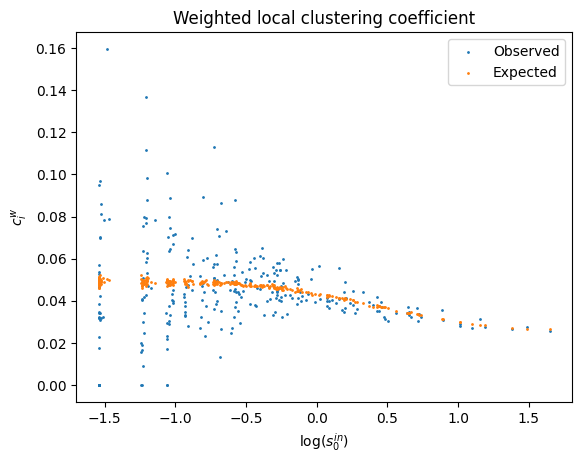

In [49]:
plt.scatter(np.log10(in_strengths), network_properties.weighted_clustering_coeff(original_graph), s=1, label="Observed")
plt.scatter(np.log10(in_strengths), exp_weighted_cl_coeff, s=1, label="Expected")
plt.legend()
plt.xlabel(r"$\log(s_0^{in})$")
plt.ylabel(r"$c_i^w$")
plt.title("Weighted local clustering coefficient")

## DebtRank

In [3]:
from scipy import linalg

In [19]:
def compute_max_eigval(graph):
    adj = np.array(graph.get_adjacency(attribute="weight").data)
    e_vals = np.abs(linalg.eigvals(adj))
    return max(e_vals)

y_0 = 20W, x_0 = 0.1y_0

### On ensemble, differ z

In [37]:
from tqdm import tqdm

In [140]:
n=100
ensemble_arr = []
z_arr = np.logspace(-6, 1, 15)

In [141]:
z_arr

array([1.00000000e-06, 3.16227766e-06, 1.00000000e-05, 3.16227766e-05,
       1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01])

In [142]:
for z in tqdm(z_arr):
    ensemble_arr.append(renormalizable_model.generate_RM_ensemble(n, strengths, z, weighted=True))

100%|██████████| 15/15 [06:34<00:00, 26.28s/it]


In [153]:
len(ensemble_arr)

15

In [155]:
all_max_eigvals = []
for i in tqdm(range(len(ensemble_arr))):
    all_max_eigvals.append([compute_max_eigval(graph) for graph in tqdm(ensemble_arr[i])])

100%|██████████| 15/15 [01:24<00:00,  5.62s/it]


In [156]:
max_array = [np.max(eigvals) for eigvals in all_max_eigvals]
min_array = [np.min(eigvals) for eigvals in all_max_eigvals]
mean_array = [np.mean(eigvals) for eigvals in all_max_eigvals]

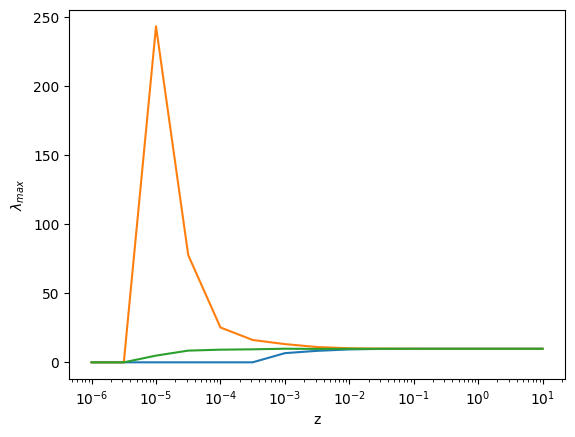

In [157]:
plt.plot(z_arr, min_array)
plt.plot(z_arr, max_array)
plt.plot(z_arr, mean_array)
plt.xlabel("z")
plt.ylabel(r'$\lambda_{max}$')
plt.xscale("log")

### Merging nodes

In [80]:
from src import coarse_graining

#### z = 10<sup>-3</sup>

In [82]:
n=100
ensemble = renormalizable_model.generate_RM_ensemble(n, strengths, z=10*(-3), weighted=True)

In [83]:
merge_nodes_numbers = [1,50,100,150,200,250,300,350,400,450,500]

In [84]:
coarse_grained_endemble_array = [[coarse_graining.coarse_grain_weighted_graph(graph, coarse_graining.merge_n_group(graph,i)) for graph in tqdm(ensemble)] for i in tqdm(merge_nodes_numbers)]

100%|██████████| 11/11 [00:32<00:00,  2.92s/it]


In [88]:
max_eigvals_coarsegrained = [[compute_max_eigval(graph) for graph in tqdm(ensemble)] for ensemble in coarse_grained_endemble_array]

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 58375.84it/s]


In [92]:
max_array_coarsegrained = [np.max(eigvals) for eigvals in max_eigvals_coarsegrained]
min_array_coarsegrained = [np.min(eigvals) for eigvals in max_eigvals_coarsegrained]
mean_array_coarsegrained = [np.mean(eigvals) for eigvals in max_eigvals_coarsegrained]

Text(0.5, 1.0, '$\\lambda_{max}$ for fixed $z=10^{-3}$')

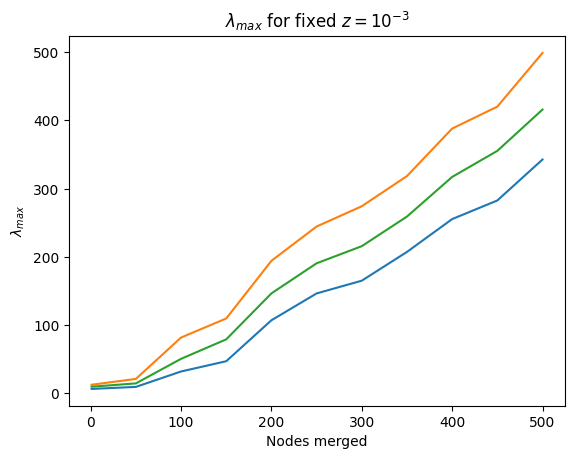

In [101]:
plt.plot(merge_nodes_numbers, min_array_coarsegrained)
plt.plot(merge_nodes_numbers, max_array_coarsegrained)
plt.plot(merge_nodes_numbers, mean_array_coarsegrained)
plt.xlabel("Nodes merged")
plt.ylabel(r'$\lambda_{max}$')
plt.title(r'$\lambda_{max}$ for fixed $z=10^{-3}$')

#### z = 10<sup>-4</sup>

In [102]:
n=100
ensemble = renormalizable_model.generate_RM_ensemble(n, strengths, z=10*(-4), weighted=True)
merge_nodes_numbers = [1,50,100,150,200,250,300,350,400,450,500]
coarse_grained_endemble_array = [[coarse_graining.coarse_grain_weighted_graph(graph, coarse_graining.merge_n_group(graph,i)) for graph in tqdm(ensemble)] for i in tqdm(merge_nodes_numbers)]
max_eigvals_coarsegrained = [[compute_max_eigval(graph) for graph in tqdm(ensemble)] for ensemble in coarse_grained_endemble_array]
max_array_coarsegrained = [np.max(eigvals) for eigvals in max_eigvals_coarsegrained]
min_array_coarsegrained = [np.min(eigvals) for eigvals in max_eigvals_coarsegrained]
mean_array_coarsegrained = [np.mean(eigvals) for eigvals in max_eigvals_coarsegrained]

100%|██████████| 100/100 [00:00<00:00, 48332.61it/s]


Text(0.5, 1.0, '$\\lambda_{max}$ for fixed $z=10^{-4}$')

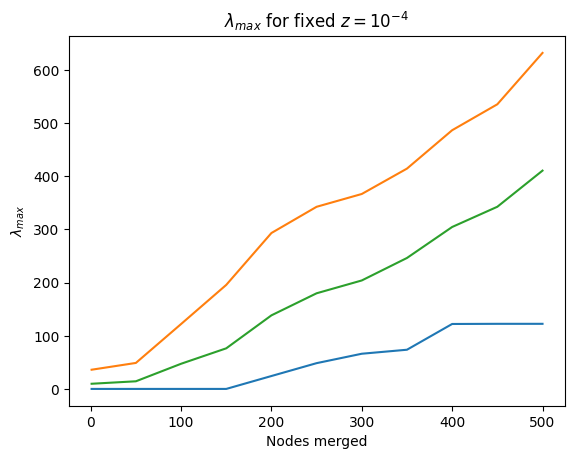

In [103]:
plt.plot(merge_nodes_numbers, min_array_coarsegrained)
plt.plot(merge_nodes_numbers, max_array_coarsegrained)
plt.plot(merge_nodes_numbers, mean_array_coarsegrained)
plt.xlabel("Nodes merged")
plt.ylabel(r'$\lambda_{max}$')
plt.title(r'$\lambda_{max}$ for fixed $z=10^{-4}$')

#### z = 10<sup>-2</sup>

In [104]:
n=100
ensemble = renormalizable_model.generate_RM_ensemble(n, strengths, z=10*(-2), weighted=True)
merge_nodes_numbers = [1,50,100,150,200,250,300,350,400,450,500]
coarse_grained_endemble_array = [[coarse_graining.coarse_grain_weighted_graph(graph, coarse_graining.merge_n_group(graph,i)) for graph in tqdm(ensemble)] for i in tqdm(merge_nodes_numbers)]
max_eigvals_coarsegrained = [[compute_max_eigval(graph) for graph in tqdm(ensemble)] for ensemble in coarse_grained_endemble_array]
max_array_coarsegrained = [np.max(eigvals) for eigvals in max_eigvals_coarsegrained]
min_array_coarsegrained = [np.min(eigvals) for eigvals in max_eigvals_coarsegrained]
mean_array_coarsegrained = [np.mean(eigvals) for eigvals in max_eigvals_coarsegrained]

100%|██████████| 100/100 [00:00<00:00, 55590.51it/s]


Text(0.5, 1.0, '$\\lambda_{max}$ for fixed $z=10^{-2}$')

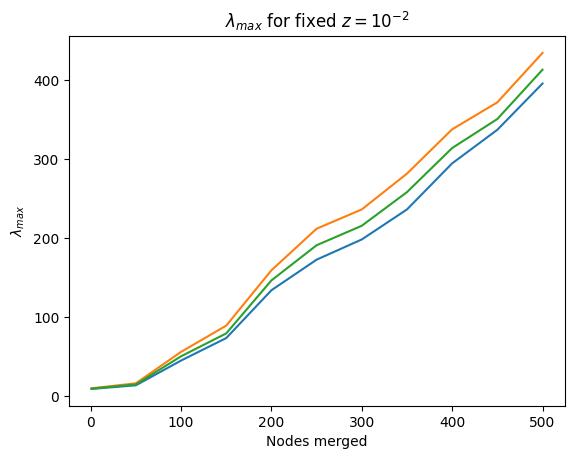

In [105]:
plt.plot(merge_nodes_numbers, min_array_coarsegrained)
plt.plot(merge_nodes_numbers, max_array_coarsegrained)
plt.plot(merge_nodes_numbers, mean_array_coarsegrained)
plt.xlabel("Nodes merged")
plt.ylabel(r'$\lambda_{max}$')
plt.title(r'$\lambda_{max}$ for fixed $z=10^{-2}$')

#### With equity

In [114]:
def create_RM_graph_equities(strengths, equities, z, weighted=False):
    graph = renormalizable_model.create_RM_graph(strengths, z, weighted)
    graph.vs["equity"] = equities
    return graph

In [115]:
def generate_RM_ensemble_equities(n, strengths, equities, z, weighted=False):
    return [create_RM_graph_equities(strengths, equities, z, weighted) for i in tqdm(range(n))]

In [130]:
def coarse_grain_weighted_graph_equities(graph, group_sequence):
    new_graph = ig.Graph(len(group_sequence), edges=[], directed=True)
    edges_to_add = []
    weights_to_add = []
    for i in range(len(group_sequence)):
        for j in range(len(group_sequence)):
            connected = False
            total_weight = 0
            for k in group_sequence[i]:
                for l in group_sequence[j]:
                    #print(k, l)
                    if graph.are_connected(k, l):
                        #print(k, l, "connected, adding weight", graph.es[graph.get_eid(k,l)]["weight"])
                        connected = True
                        total_weight += graph.es[graph.get_eid(k,l)]["weight"]
            if connected:
                edges_to_add.append((i,j))
                weights_to_add.append(total_weight)
    equities_to_add = np.zeros(len(group_sequence))
    for i in range(len(group_sequence)):
        for id in group_sequence[i]:
            equities_to_add[i] += graph.vs[id]["equity"]
    new_graph.add_edges(edges_to_add)
    new_graph.es["weight"] = weights_to_add
    new_graph.vs["equity"] = equities_to_add
    return new_graph

In [119]:
def debt_rank_max_eqigenvalue(graph):
    adj = np.array(graph.get_adjacency(attribute="weight").data)
    for i in range(len(adj)):
        adj[i] = adj[i]/graph.vs[i]["equity"]
    e_vals = np.abs(linalg.eigvals(adj))
    return max(e_vals)

#### z = 10<sup>-4</sup>

In [134]:
n=100
equities = np.ones(n)
ensemble = generate_RM_ensemble_equities(n, strengths, equities, z=10**(-4), weighted=True)

100%|██████████| 100/100 [00:23<00:00,  4.34it/s]


In [135]:
merge_nodes_numbers = [1,50,100,150,200,250,300,350,400,450,500]
coarse_grained_endemble_array = [[coarse_grain_weighted_graph_equities(graph, coarse_graining.merge_n_group(graph,i)) for graph in tqdm(ensemble)] for i in tqdm(merge_nodes_numbers)]
max_eigvals_coarsegrained = [[debt_rank_max_eqigenvalue(graph) for graph in tqdm(ensemble)] for ensemble in coarse_grained_endemble_array]
max_array_coarsegrained = [np.max(eigvals) for eigvals in max_eigvals_coarsegrained]
min_array_coarsegrained = [np.min(eigvals) for eigvals in max_eigvals_coarsegrained]
mean_array_coarsegrained = [np.mean(eigvals) for eigvals in max_eigvals_coarsegrained]

100%|██████████| 100/100 [00:00<00:00, 41116.60it/s]


Text(0.5, 1.0, '$\\lambda_{max}$ for fixed $z=10^{-4}$')

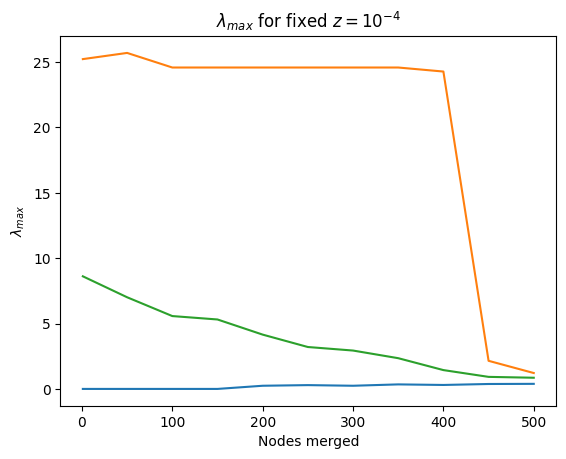

In [136]:
plt.plot(merge_nodes_numbers, min_array_coarsegrained)
plt.plot(merge_nodes_numbers, max_array_coarsegrained)
plt.plot(merge_nodes_numbers, mean_array_coarsegrained)
plt.xlabel("Nodes merged")
plt.ylabel(r'$\lambda_{max}$')
plt.title(r'$\lambda_{max}$ for fixed $z=10^{-4}$')

#### z = 10<sup>-2</sup>

In [137]:
n=100
equities = np.ones(n)
ensemble = generate_RM_ensemble_equities(n, strengths, equities, z=10**(-2), weighted=True)

100%|██████████| 100/100 [00:23<00:00,  4.32it/s]


In [138]:
merge_nodes_numbers = [1,50,100,150,200,250,300,350,400,450,500]
coarse_grained_endemble_array = [[coarse_grain_weighted_graph_equities(graph, coarse_graining.merge_n_group(graph,i)) for graph in tqdm(ensemble)] for i in tqdm(merge_nodes_numbers)]
max_eigvals_coarsegrained = [[debt_rank_max_eqigenvalue(graph) for graph in tqdm(ensemble)] for ensemble in coarse_grained_endemble_array]
max_array_coarsegrained = [np.max(eigvals) for eigvals in max_eigvals_coarsegrained]
min_array_coarsegrained = [np.min(eigvals) for eigvals in max_eigvals_coarsegrained]
mean_array_coarsegrained = [np.mean(eigvals) for eigvals in max_eigvals_coarsegrained]

100%|██████████| 100/100 [00:00<00:00, 52599.75it/s]


Text(0.5, 1.0, '$\\lambda_{max}$ for fixed $z=10^{-2}$')

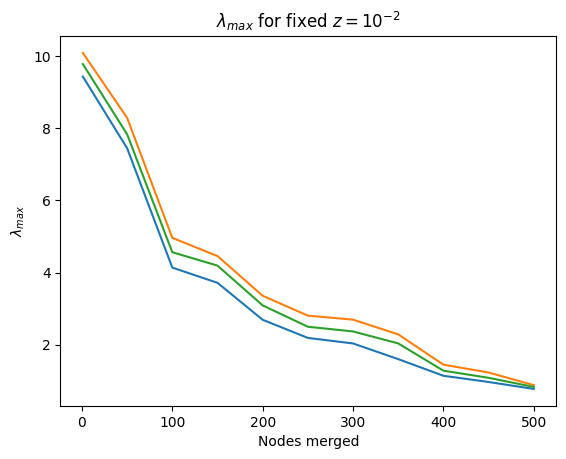

In [139]:
plt.plot(merge_nodes_numbers, min_array_coarsegrained)
plt.plot(merge_nodes_numbers, max_array_coarsegrained)
plt.plot(merge_nodes_numbers, mean_array_coarsegrained)
plt.xlabel("Nodes merged")
plt.ylabel(r'$\lambda_{max}$')
plt.title(r'$\lambda_{max}$ for fixed $z=10^{-2}$')